# Problem Set 3: Neural Networks

This assignment requires a working IPython Notebook installation, which you should already have. If not, please refer to the instructions in the previous problem sets.

### ** IMPORTANT NOTE FOR SUBMISSION **
### In part 2 (programming) of this assignment, you DO NOT need to make modification to any existing code in this IPython Notebook. Instead you will implement your own simple neural network in the `mlp.py` file. To submit your answers, copy and paste the content of your `mlp.py` at the end of this IPython Notebook, then submit a single PDF version of this notebook.

Total: 100 points.

## [30pts] Problem 1: Backprop in a simple MLP
This problem asks you to derive all the steps of the backpropagation algorithm for a simple classification network. Consider a fully-connected neural network, also known as a multi-layer perceptron (MLP), with a single hidden layer and a one-node output layer. The hidden and output nodes use an elementwise sigmoid activation function and the loss layer uses cross-entropy loss:

$f(z)=\frac{1}{1+exp(-z))}$

$L(\hat{y},y)=-yln(\hat{y}) - (1-y)ln(1-\hat{y})$


The computation graph for an example network is shown below. Note that it has an equal number of nodes in the input and hidden layer (3 each), but, in general, they need not be equal. Also, to make the application of backprop easier, we show the <i>computation graph</i> which shows the dot product and activation functions as their own nodes, rather than the usual graph showing a single node for both.


<img src="mlpgraph.png" style="height:200px;">
<!-- <img src="https://drive.google.com/uc?export=view&id=1_FvNVqJexJJgocMIoSUATyUqG5R2wpEN" style="height:200px;"> -->

The forward and backward computation are given below. NOTE: We assume no regularization, so you can omit the terms involving $\Omega$.

The forward step is:

<img src="forward.png" style="width:500px;">
<!-- <img src="https://drive.google.com/uc?export=view&id=1e7pR93QVbOpTkYwEySQcxG57-ckd0G1N" style="width:500px;"> -->
and the backward step is:

<img src="backward.png" style="width:500px;">
<!-- <img src="https://drive.google.com/uc?export=view&id=1uYe8fawlsVNKO_KjqWCxxwGEjuVnirVT" style="width:500px;"> -->

Write down each step of the backward pass explicitly for all layers, i.e. compute all intermediate gradients of $J$ above, expressing them as a function of variables $x$ (a vector of inputs), $y$ (a scalar label), $h^{(k)}$ (layer k outputs), $W^{(k)}$ (parameters in layer k), and $b^{(k)}$ (bias parameters of layer k). Notice that $h^{(k)}$ and $b^{(k)}$ can be scalars or vectors depending on layer k, and $W^{(k)}$ can be a matrix or a vector. NOTE: We will assume no regularization, so you can omit the terms involving $\Omega$.

As an example, we will derive the first gradient for you, i.e. the gradient of the cross entropy loss w.r.t. its (scalar) input $\nabla_{\hat{y}}J=\nabla_{\hat{y}}L(\hat{y},y)$.

$ \nabla_{\hat{y}}L(\hat{y},y) =  \nabla_{\hat{y}}[-yln(\hat{y}) - (1-y)ln(1-\hat{y})] = \frac{\hat{y}-y}{(1-\hat{y})\hat{y}} = \frac{h^{(2)}-y}{(1-h^{(2)})h^{(2)}}$

Please derive the remaining gradients, listed below.

<i>Hint: you should substitute the updated values for the gradient $g$ in each step and simplify as much as possible.</i>  

*Hint: Useful information about vectorized chain rule and backpropagation*:
<br> If you are struggling with computing the vectorized version of chain rule you may find this example helpful:
https://web.stanford.edu/class/cs224n/readings/gradient-notes.pdf
<br> It also contains some helpful shortcuts for computing gradients.

**[5pts] Q1.1**: Derive $\nabla_{a^{(2)}}J$, where $a^{(2)}$ the (scalar) pre-nonlinearity activation of layer 2.

*Hint: to get this scalar value, multiply the partial value $g$, which should be equal to the $\nabla_{\hat{y}}L(\hat{y},y)$ that we computed above, with the sigmoid derivative $f'({a^{(2)}})$, and note that $f(a^{(2)})=h^{(2)}$.*

** `[double click here to add a solution]` **

**[5pts] Q1.2**: $\nabla_{b^{(2)}}J$

** `[double click here to add a solution]` **

**[5pts] Q1.3**: $\nabla_{W^{(2)}}J$ <br><i>Hint: this should be a vector, since $W^{(2)}$ is a vector. </i>

** `[double click here to add a solution]` **

**[5pts] Q1.4**: $\nabla_{h^{(1)}}J$

** `[double click here to add a solution]` **

**[5pts] Q1.5**: $\nabla_{b^{(1)}}J$, $\nabla_{W^{(1)}}J$

** `[double click here to add a solution]` **

**[5pts] Q1.6** Briefly, explain how the computational speed of backpropagation would be affected if it did not include a forward pass

** `[double click here to add a solution]` **

## [50pts] Problem 2 (Programming): Implementing a simple MLP
In this problem we will develop a neural network with fully-connected layers, or Multi-Layer Perceptron (MLP). We will use it in classification tasks.

In the current directory, you can find a file `mlp.py`, which contains the definition for class `TwoLayerMLP`. As the name suggests, it implements a 2-layer MLP, or MLP with 1 *hidden* layer. The hidden layer will have either the softmax or the RELU activation function. You will implement your code in the same file, and call the member functions in this notebook. Below is some initialization. The `autoreload` command makes sure that `mlp.py` is periodically reloaded.

In [20]:
# setup
import numpy as np
import matplotlib.pyplot as plt
from mlp import TwoLayerMLP

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Next we initialize a toy model and some toy data, the task is to classify five 4-d vectors.

In [14]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model(actv, std=1e-1):
    np.random.seed(0)
    return TwoLayerMLP(input_size, hidden_size, num_classes, std=std, activation=actv)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

X, y = init_toy_data()
print('X = ', X)
print()
print('y = ', y)

X =  [[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]]

y =  [0 1 2 2 1]


### [5pts] Q2.1 Forward pass: Sigmoid

The network takes a D-dimensional input vector and predicts C classes. It has the following architecture:

input - fully connected layer - ReLU (or sigmoid) - fully connected layer - softmax - Loss


In [15]:
# W1: First layer weights; has shape (D, H)
# b1: First layer biases; has shape (H,)
# W2: Second layer weights; has shape (H, C)
# b2: Second layer biases; has shape (C,)

Our 2-layer MLP uses a softmax output layer (**note**: this means that you don't need to apply a sigmoid on the output) and the multiclass cross-entropy loss to perform classification.

**Softmax function**:
<br> For class j:
$$P(y_{j}|x) = \frac{\exp(z_j)}{\sum_{c=1}^{C} \exp(z_c)}$$

Where C is the number of classes and z is class-wise output of the network.

**Multiclass cross-entropy loss function**:
$$J \ = \ \frac{1}{m} \ \sum_{i=1}^{m} \sum_{c=1}^{C} \ [ \ -y^{(i)}_{c} log(P(y^{(i)}_{c}|x^{(i)})) \ ]$$

$ y^{(i)}_{c} $ is the label of i-th sample with respect to class $c$, and $ y^{(i)}_{c} = 1 $ for the ground truth class and 0 otherwise.

m is the number of inputs in a batch and C is the number of classes.

Please take a look at method `TwoLayerMLP.loss` in the file `mlp.py`. This function takes in the data and weight parameters, and computes the class scores (aka logits), the loss $L$, and the gradients on the parameters.

- Complete the implementation of forward pass (up to the computation of `scores`) for the sigmoid activation: $\sigma(x)=\frac{1}{1+exp(-x)}$.

**Note 1**: Softmax cross entropy loss involves the [log-sum-exp operation](https://en.wikipedia.org/wiki/LogSumExp). This can result in numerical underflow/overflow. Read about the solution in the link, and try to understand the calculation of `loss` in the code.

**Note 2**: You're strongly encouraged to implement in a vectorized way and avoid using slower `for` loops. Note that most numpy functions support vector inputs.

Check the correctness of your forward pass below. The difference should be very small (<1e-6).

In [18]:
net = init_toy_model('sigmoid')
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.182248
print(loss)
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

1.1822479803941373
Difference between your loss and correct loss:
1.9605862711102873e-08


### [10pts] Q2.2 Backward pass: Sigmoid
- For sigmoid activation, complete the computation of `grads`, which stores the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`.

**Notes:** The outputs of the second fully-connected layer are the "scores" for each class. These are also often called "logits" and are the pre-nonlinearity values. After they go through the nonlinear softmax function they become probabilities. In the provided code they are stored in the N-by-C matrix "scores", i.e. for each data point there are C scores, one for each class.

In the backward pass you are asked to calculate the partial derivatives of the Loss with respect to each set of parameters and intermediate functions, using the backpropagation algorithm we covered in class. Each derivative is stored in a variable that starts with "d", so "dscores" refers to the derivative of the loss wrt the "scores" variable (the logits). Similarly, "dW2" stores the derivatives wrt the W2 parameters, etc.

Note that the derivatives should have the same shape as the variable, i.e. "dscores" should also be N-by-C.

"dW2" and "db2" have already been implemented for you.

In the first fully-connected layer, "dhidden" stores the derivatives wrt this layer's activations produced **after** the nonlinearity, i.e. "hidden" is the variable which is the input to the second fully-connected layer. This is the only hidden layer in this network, ie we do not observe its output during training.

Finally, when computing the rest of the backward pass, you need to include the local derivative of the nonlinear function of the first layer, which for this question is the sigmoid. Because the backward pass is modular, you only need to change this local derivative, the rest can remain the same!

By the way, mapping onto the first problem, "dscores" would be analogous to the derivative in Q1.1 and "dhidden" analogous to Q1.4, although the network structures are slightly different.


Now debug your backward pass using a numeric gradient check. Again, the differences should be very small.

In [32]:
# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.
from utils import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.1)

# these should all be very small
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e'%(param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 1.527005e-09
b2 max relative error: 5.553985e-11
W1 max relative error: 1.126756e-08
b1 max relative error: 2.035407e-06


### [5pts] Q2.3 Train the Sigmoid network
To train the network we will use stochastic gradient descent (SGD), implemented in `TwoLayerNet.train`. Then we train a two-layer network on toy data.

- Implement the prediction function `TwoLayerNet.predict`, which is called during training to keep track of training and validation accuracy.

You should get the final training loss around 0.1, which is good, but not too great for such a toy problem.  One problem is that the gradient magnitude for W1 (the first layer weights) stays small all the time, and the neural net doesn't get much "learning signals". This has to do with the saturation problem of the sigmoid activation function.

Final training loss:  0.10926794610680679


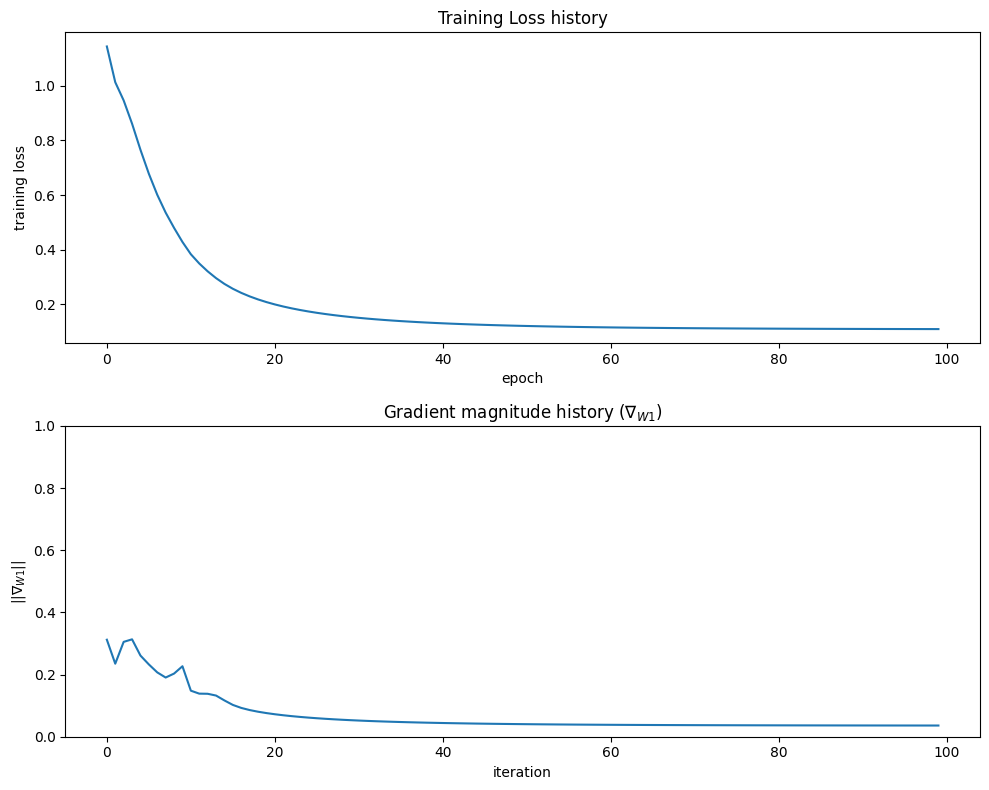

In [33]:
net = init_toy_model('sigmoid', std=1e-1)
stats = net.train(X, y, X, y,
                  learning_rate=0.5, reg=1e-5,
                  num_epochs=100, verbose=False)
print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history and gradient magnitudes
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(stats['loss_history'])
ax1.set_xlabel('epoch')
ax1.set_ylabel('training loss')
ax1.set_title('Training Loss history')
ax2.plot(stats['grad_magnitude_history'])
ax2.set_xlabel('iteration')
ax2.set_ylabel(r'$||\nabla_{W1}||$')
ax2.set_title('Gradient magnitude history ' +  r'($\nabla_{W1}$)')
ax2.set_ylim(0,1)
fig.tight_layout()
plt.show()

### [5pts] Q2.4 Using ReLU activation
The Rectified Linear Unit (ReLU) activation is also widely used: $ReLU(x)=max(0,x)$.

- Complete the implementation for the ReLU activation (forward and backward) in `mlp.py`.
- Train the network with ReLU, and report your final training loss.

Make sure you first pass the numerical gradient check on toy data.

In [34]:
net = init_toy_model('relu', std=1e-1)

loss, grads = net.loss(X, y, reg=0.1)
print('loss = ', loss)  # correct_loss = 1.320973

# The differences should all be very small
print('checking gradients')
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e'%(param_name, rel_error(param_grad_num, grads[param_name])))

loss =  1.3037878913298202
checking gradients
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447615e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738420e-09


Now that it's working, let's train the network. Does the net get stronger learning signals (i.e. gradients) this time? Report your final training loss.

Final training loss:  0.0178562204869839


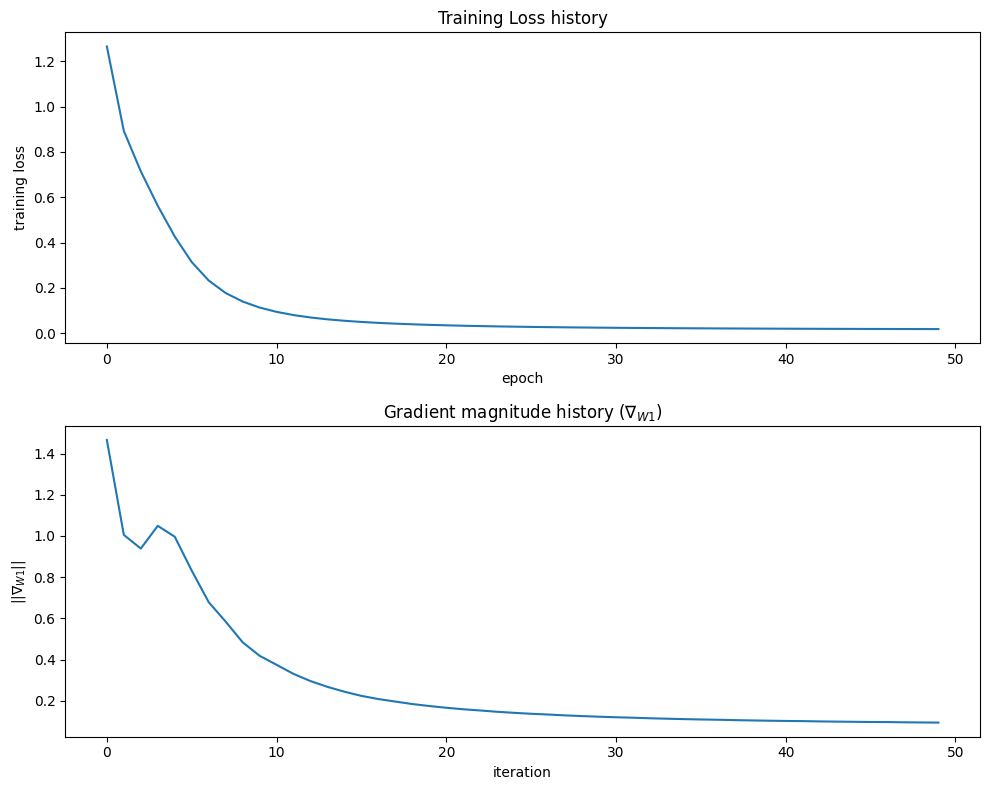

In [35]:
net = init_toy_model('relu', std=1e-1)
stats = net.train(X, y, X, y,
                  learning_rate=0.1, reg=1e-5,
                  num_epochs=50, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(stats['loss_history'])
ax1.set_xlabel('epoch')
ax1.set_ylabel('training loss')
ax1.set_title('Training Loss history')
ax2.plot(stats['grad_magnitude_history'])
ax2.set_xlabel('iteration')
ax2.set_ylabel(r'$||\nabla_{W1}||$')
ax2.set_title('Gradient magnitude history ' +  r'($\nabla_{W1}$)')
fig.tight_layout()
plt.show()

## Load MNIST data
Now that you have implemented a two-layer network that works on toy data, let's try some real data. The MNIST dataset is a standard machine learning benchmark. It consists of 70,000 grayscale handwritten digit images, which we split into 50,000 training, 10,000 validation and 10,000 testing. The images are of size 28x28, which are flattened into 784-d vectors.

**Note 1**: the function `get_MNIST_data` requires the `scikit-learn` package. If you previously did anaconda installation to set up your Python environment, you should already have it. If you are using Google Colab, Colab should also have installed it for you. Otherwise, you can install it following the instructions here: http://scikit-learn.org/stable/install.html

**Note 2**: If you encounter a `HTTP 500` error, that is likely temporary, just try again.

**Note 3**: Ensure that the downloaded MNIST file is 55.4MB (smaller file-sizes could indicate an incomplete download - which is possible)

In [37]:
# load MNIST
from utils import get_MNIST_data
X_train, y_train, X_val, y_val, X_test, y_test = get_MNIST_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 784)
Train labels shape:  (50000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


### Train a network on MNIST
We will now train a network on MNIST with 64 hidden units in the hidden layer. We train it using SGD, and decrease the learning rate with an exponential rate over time; this is achieved by multiplying the learning rate with a constant factor `learning_rate_decay` (which is less than 1) after each epoch. In effect, we are using a high learning rate initially, which is good for exploring the solution space, and using lower learning rates later to encourage convergence to a local minimum (or [saddle point](http://www.offconvex.org/2016/03/22/saddlepoints/), which may happen more often).

- Train your MNIST network with 2 different activation functions: sigmoid and ReLU.

We first define some variables and utility functions. The `plot_stats` function plots the histories of gradient magnitude, training loss, and accuracies on the training and validation sets. The `show_net_weights` function visualizes the weights learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized. Both functions help you to diagnose the training process.

In [38]:
input_size = 28 * 28
hidden_size = 64
num_classes = 10

# Plot the loss function and train / validation accuracies
def plot_stats(stats):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
    ax1.plot(stats['grad_magnitude_history'])
    ax1.set_title('Gradient magnitude history ' + r'$(\nabla_{W1})$')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel(r'$||\nabla_{W1}||$')
    ax1.set_ylim(0, np.minimum(100,np.max(stats['grad_magnitude_history'])))

    ax2.plot(stats['loss_history'])
    ax2.set_title('Loss history')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Loss')
    ax2.set_ylim(0, 100)

    ax3.plot(stats['train_acc_history'], label='train')
    ax3.plot(stats['val_acc_history'], label='val')
    ax3.set_title('Classification accuracy history')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Clasification accuracy')
    fig.tight_layout()
    plt.show()

# Visualize the weights of the network
from utils import visualize_grid
def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(-1, 28, 28)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

### [10pts] Q2.5 Train a Sigmoid network

/Users/jhonglee/Documents/boston-univ/CAS CS 542/HW/pset3/mlp.py:86: RuntimeWarning: overflow encountered in exp
  hidden = 1 / (1 + np.exp(-z1))


Epoch 1: loss 79.040004, train_acc 0.160000, val_acc 0.266300
Epoch 2: loss 49.814996, train_acc 0.500000, val_acc 0.461100
Epoch 3: loss 32.419904, train_acc 0.640000, val_acc 0.568300
Epoch 4: loss 21.756599, train_acc 0.630000, val_acc 0.639700
Epoch 5: loss 15.148895, train_acc 0.680000, val_acc 0.685000
Epoch 6: loss 10.909900, train_acc 0.680000, val_acc 0.712600
Epoch 7: loss 8.078106, train_acc 0.760000, val_acc 0.737900
Epoch 8: loss 6.166522, train_acc 0.830000, val_acc 0.755600
Epoch 9: loss 4.948016, train_acc 0.780000, val_acc 0.772900
Epoch 10: loss 4.113118, train_acc 0.760000, val_acc 0.785000
Epoch 11: loss 3.455138, train_acc 0.840000, val_acc 0.797000
Epoch 12: loss 3.026239, train_acc 0.840000, val_acc 0.808100
Epoch 13: loss 2.702231, train_acc 0.840000, val_acc 0.819600
Epoch 14: loss 2.438965, train_acc 0.820000, val_acc 0.830900
Epoch 15: loss 2.258613, train_acc 0.900000, val_acc 0.839900
Epoch 16: loss 2.166625, train_acc 0.860000, val_acc 0.846800
Epoch 17: l

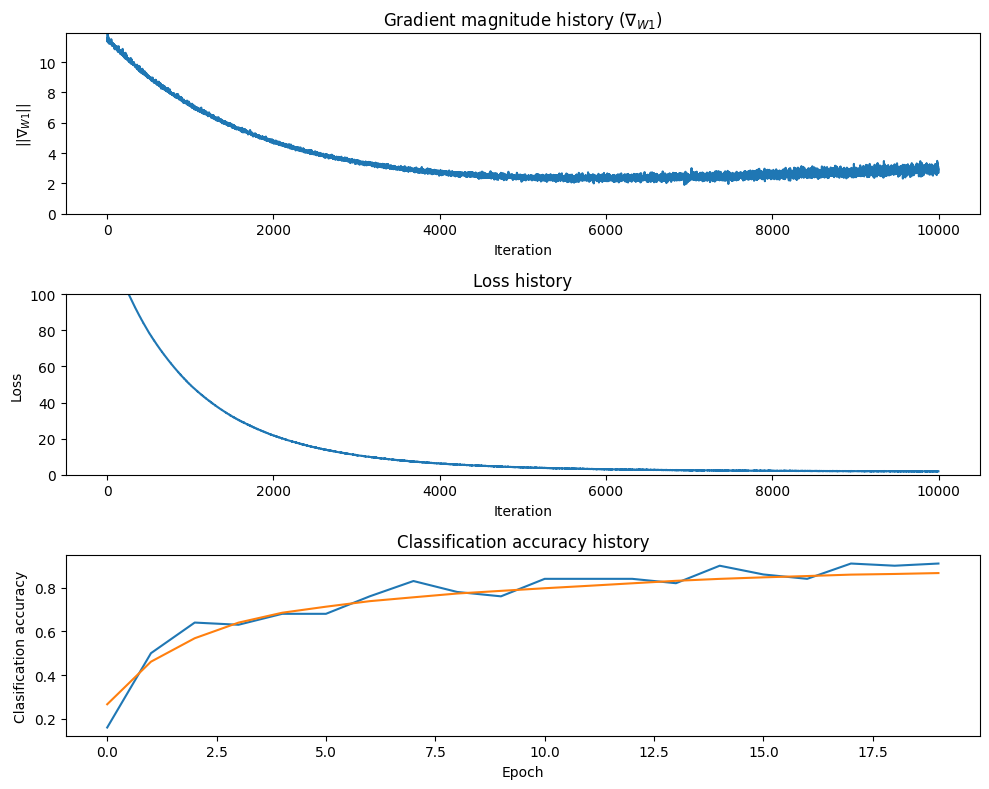

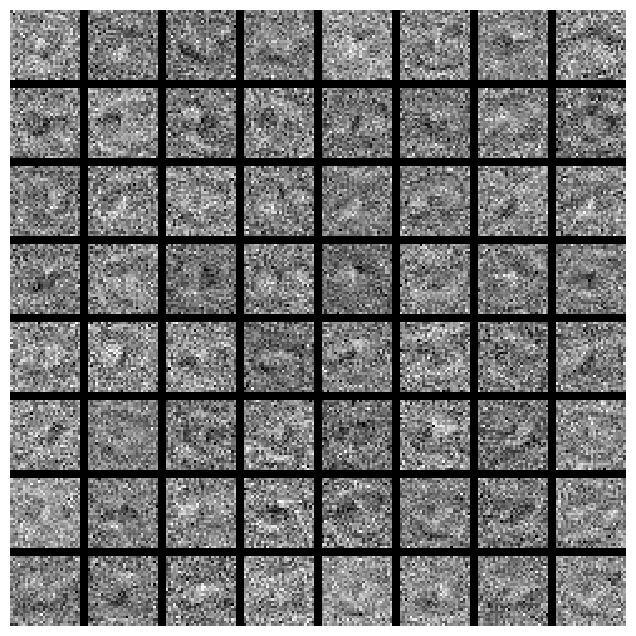

In [39]:
sigmoid_net = TwoLayerMLP(input_size, hidden_size, num_classes, activation='sigmoid', std=1e-1)

# Train the network
sigmoid_stats = sigmoid_net.train(X_train, y_train, X_val, y_val,
                                  num_epochs=20, batch_size=100,
                                  learning_rate=1e-3,  learning_rate_decay=0.95,
                                  reg=0.5, verbose=True)

# Predict on the training set
train_acc = (sigmoid_net.predict(X_train) == y_train).mean()
print('Sigmoid final training accuracy: ', train_acc)

# Predict on the validation set
val_acc = (sigmoid_net.predict(X_val) == y_val).mean()
print('Sigmoid final validation accuracy: ', val_acc)

# Predict on the test set
test_acc = (sigmoid_net.predict(X_test) == y_test).mean()
print('Sigmoid test accuracy: ', test_acc)

# show stats and visualizations
plot_stats(sigmoid_stats)
show_net_weights(sigmoid_net)

### [10pts] Q2.6 Train a ReLU network

Epoch 1: loss 77.144688, train_acc 0.910000, val_acc 0.874200
Epoch 2: loss 47.540371, train_acc 0.940000, val_acc 0.891300
Epoch 3: loss 29.869117, train_acc 0.950000, val_acc 0.905700
Epoch 4: loss 19.522937, train_acc 0.940000, val_acc 0.921100
Epoch 5: loss 13.036817, train_acc 0.950000, val_acc 0.926500
Epoch 6: loss 8.990629, train_acc 0.930000, val_acc 0.933200
Epoch 7: loss 6.142025, train_acc 0.970000, val_acc 0.941500
Epoch 8: loss 4.526421, train_acc 0.940000, val_acc 0.944900
Epoch 9: loss 3.237003, train_acc 0.980000, val_acc 0.950900
Epoch 10: loss 2.411358, train_acc 0.970000, val_acc 0.953800
Epoch 11: loss 1.849890, train_acc 0.980000, val_acc 0.956700
Epoch 12: loss 1.393594, train_acc 0.990000, val_acc 0.958800
Epoch 13: loss 1.162691, train_acc 0.980000, val_acc 0.958400
Epoch 14: loss 0.994352, train_acc 0.940000, val_acc 0.961400
Epoch 15: loss 0.815851, train_acc 0.970000, val_acc 0.961500
Epoch 16: loss 0.682429, train_acc 0.960000, val_acc 0.962600
Epoch 17: lo

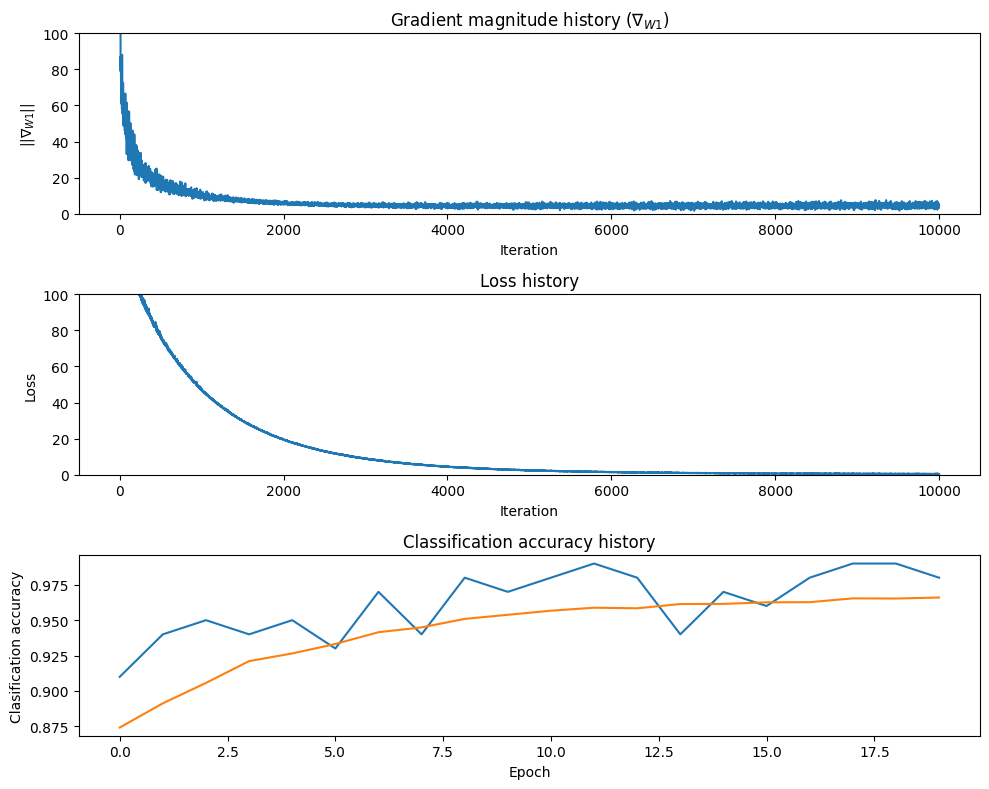

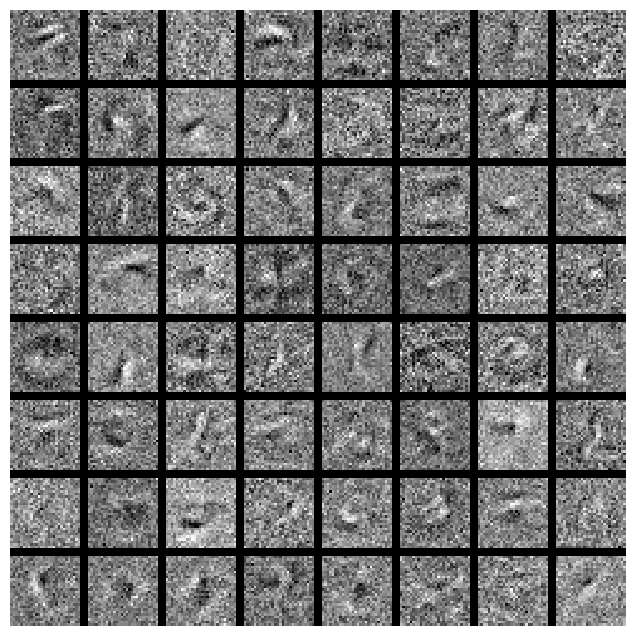

In [40]:
relu_net = TwoLayerMLP(input_size, hidden_size, num_classes, activation='relu', std=1e-1)

# Train the network
relu_stats = relu_net.train(X_train, y_train, X_val, y_val,
                            num_epochs=20, batch_size=100,
                            learning_rate=1e-3, learning_rate_decay=0.95,
                            reg=0.5, verbose=True)
# Predict on the training set
train_acc = (relu_net.predict(X_train) == y_train).mean()
print('ReLU final training accuracy: ', train_acc)

# Predict on the validation set
val_acc = (relu_net.predict(X_val) == y_val).mean()
print('ReLU final validation accuracy: ', val_acc)

# Predict on the test set
test_acc = (relu_net.predict(X_test) == y_test).mean()
print('ReLU test accuracy: ', test_acc)

# show stats and visualizations
plot_stats(relu_stats)
show_net_weights(relu_net)

### [5pts] Q2.7

Which activation function would you choose in practice? Why?

I would use the Relu activation function. First of all the data show the results it has a significan better results. Mnist dataset is the black and white data. By ignoring all the values below 0 could help find the black parts eaiser. I think this leaded to the better acuraccy.

## [20pts] Problem 3: Simple Regularization Methods
You may have noticed the `reg` parameter in `TwoLayerMLP.loss`, controlling "regularization strength". In learning neural networks, aside from minimizing a loss function $\mathcal{L}(\theta)$ with respect to the network parameters $\theta$, we usually explicitly or implicitly add some regularization term to reduce overfitting. A simple and popular regularization strategy is to penalize some *norm* of $\theta$.

### [10pts] Q3.1:  L2 regularization

We can penalize the L2 norm of $\theta$: we modify our objective function to be $\mathcal{L}(\theta) + \lambda \|\theta\|^2$ where $\lambda$ is the weight of regularization.
We will minimize this objective using gradient descent with step size $\eta$.
Derive the update rule: at time $t+1$, express the new parameters $\theta_{t+1}$ in terms of the old parameters $\theta_t$, the gradient $g_t=\frac{\partial \mathcal{L}}{\partial \theta_t}$, $\eta$, and $\lambda$.

** `[double click here to add a solution]` **

### [10pts] Q3.2:  L1 regularization

Now let's consider L1 regularization: our objective in this case is $\mathcal{L}(\theta) + \lambda \|\theta\|_1$. Derive the update rule.

(Technically this becomes *Sub-Gradient* Descent since the L1 norm is not differentiable at 0. But practically it is usually not an issue.)

** `[double click here to add a solution]` **

# Supplementary Material

In [ ]:
### copy and paste the content of your mlp.py here ###
import numpy as np
import matplotlib.pyplot as plt

class TwoLayerMLP(object):
  """
  A two-layer fully-connected neural network. The net has an input dimension of
  N, a hidden layer dimension of H, and performs classification over C classes.
  We train the network with a softmax loss function and L2 regularization on the
  weight matrices. The network uses a ReLU nonlinearity after the first fully
  connected layer.

  In other words, the network has the following architecture:

  input - fully connected layer - ReLU - fully connected layer - softmax

  The outputs of the second fully-connected layer are the scores for each class.
  """

  def __init__(self, input_size, hidden_size, output_size, std=1e-4, activation='relu'):
    """
    Initialize the model. Weights are initialized to small random values and
    biases are initialized to zero. Weights and biases are stored in the
    variable self.params, which is a dictionary with the following keys:

    W1: First layer weights; has shape (D, H)
    b1: First layer biases; has shape (H,)
    W2: Second layer weights; has shape (H, C)
    b2: Second layer biases; has shape (C,)

    Inputs:
    - input_size: The dimension D of the input data.
    - hidden_size: The number of neurons H in the hidden layer.
    - output_size: The number of classes C.
    """
    self.params = {}
    self.params['W1'] = std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)
    self.activation = activation


  def loss(self, X, y=None, reg=0.0):
    """
    Compute the loss and gradients for a two layer fully connected neural
    network.

    Inputs:
    - X: Input data of shape (N, D). Each X[i] is a training sample.
    - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
      an integer in the range 0 <= y[i] < C. This parameter is optional; if it
      is not passed then we only return scores, and if it is passed then we
      instead return the loss and gradients.
    - reg: Regularization strength.

    Returns:
    If y is None, return a matrix scores of shape (N, C) where scores[i, c] is
    the score for class c on input X[i].

    If y is not None, instead return a tuple of:
    - loss: Loss (data loss and regularization loss) for this batch of training
      samples.
    - grads: Dictionary mapping parameter names to gradients of those parameters
      with respect to the loss function; has the same keys as self.params.
    """
    # Unpack variables from the params dictionary
    W1, b1 = self.params['W1'], self.params['b1']
    W2, b2 = self.params['W2'], self.params['b2']
    _, C = W2.shape
    N, D = X.shape

    # Compute the forward pass
    ###########################################################################
    # write your own code where you see [PLEASE IMPLEMENT]
    #
    # Perform the forward pass, computing the class scores for the input.
    # Store the result in the scores variable, which should be an array of
    # shape (N, C).
    ###########################################################################
    z1 = np.dot(X, W1) + b1  # 1st layer activation, N*H 

    # 1st layer nonlinearity, N*H
    if self.activation == 'relu':
        hidden = np.maximum(0, z1)
    elif self.activation == 'sigmoid':
        hidden = 1 / (1 + np.exp(-z1))
    else:
        raise ValueError('Unknown activation type')
        
    # [PLEASE IMPLEMENT] 2nd layer activation, N*C
    # hint: involves W2, b2
    z2 = np.dot(hidden, W2) + b2
    
    # No need to make Softmax function, I took me so long to figure it out....
    # a2 = np.exp(z2) / np.sum(np.exp(z2), axis = 1, keepdims=True)
      
    scores = z2  # Scores N*C 
    ###########################################################################
    #                            END OF YOUR CODE
    ###########################################################################
    
    # If the targets are not given then jump out, we're done
    if y is None:
      return scores

    # cross-entropy loss with log-sum-exp
    A = np.max(scores, axis=1) # N*1 All the preficted classes
    F = np.exp(scores - A.reshape(N, 1))  # N*C the predicted one will be 0 and rests will be negative values
    P = F / np.sum(F, axis=1).reshape(N, 1)  # N*C changed into positive values
    loss = np.mean(-np.choose(y, scores.T) + np.log(np.sum(F, axis=1)) + A) 
    # add regularization terms
    loss += 0.5 * reg * np.sum(W1 * W1)
    loss += 0.5 * reg * np.sum(W2 * W2)


    # Backward pass: compute gradients
    grads = {}
    ###########################################################################
    # write your own code where you see [PLEASE IMPLEMENT]
    #
    # Compute the backward pass, computing the derivatives of the weights
    # and biases. Store the results in the grads dictionary. For example,
    # grads['W1'] should store the gradient on W1, and be a matrix of same size.
    # You should define the hidden variable in the part where you implement the 
    # different activation functions. "hidden" is the output after you apply 
    # the activation function for the hidden layer. 
    # Hint: you should apply different activation functions on "z1" and get "hidden".   
    ###########################################################################

    # output layer
    dscore = (P - np.eye(C)[y])   #  partial derivative of loss wrt. the logits (dL/dz)
    dW2 = np.dot(hidden.T, dscore) / N  # partial derivative of loss wrt. W2
    db2 = np.mean(dscore, axis=0)     # partial derivation of loss wrt. b2

    # hidden layer
    dhidden = np.dot(dscore, W2.T) 
    
    if self.activation == 'relu':
        dz1 = dhidden * (z1 > 0).astype(float)
    elif self.activation == 'sigmoid':
        dz1 = dhidden * hidden * (1 - hidden)
    else:
        raise ValueError('Unknown activation type')

    # first layer
    dW1 = np.dot(X.T, dz1) / N   
    db1 = np.mean(dz1, axis=0)
    ###########################################################################
    #                            END OF YOUR CODE
    ###########################################################################

    grads['W2'] = dW2 + reg * W2
    grads['b2'] = db2
    grads['W1'] = dW1 + reg * W1
    grads['b1'] = db1
    return loss, grads


  def train(self, X, y, X_val, y_val,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=1e-5, num_epochs=10,
            batch_size=200, verbose=False):
    """
    Train this neural network using stochastic gradient descent.

    Inputs:
    - X: A numpy array of shape (N, D) giving training data.
    - y: A numpy array f shape (N,) giving training labels; y[i] = c means that
      X[i] has label c, where 0 <= c < C.
    - X_val: A numpy array of shape (N_val, D) giving validation data.
    - y_val: A numpy array of shape (N_val,) giving validation labels.
    - learning_rate: Scalar giving learning rate for optimization.
    - learning_rate_decay: Scalar giving factor used to decay the learning rate
      after each epoch.
    - reg: Scalar giving regularization strength.
    - num_iters: Number of steps to take when optimizing.
    - batch_size: Number of training examples to use per step.
    - verbose: boolean; if true print progress during optimization.
    """
    num_train = X.shape[0]
    iterations_per_epoch = max(int(num_train / batch_size), 1)
    epoch_num = 0

    # Use SGD to optimize the parameters in self.model
    loss_history = []
    grad_magnitude_history = []
    train_acc_history = []
    val_acc_history = []

    np.random.seed(1)
    for epoch in range(num_epochs):
        # fixed permutation (within this epoch) of training data
        perm = np.random.permutation(num_train)

        # go through minibatches
        for it in range(iterations_per_epoch):
            X_batch = None
            y_batch = None

            # Create a random minibatch
            idx = perm[it*batch_size:(it+1)*batch_size]
            X_batch = X[idx, :]
            y_batch = y[idx]

            # Compute loss and gradients using the current minibatch
            loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
            loss_history.append(loss)

            # do gradient descent
            for param in self.params:
                self.params[param] -= grads[param] * learning_rate

            # record gradient magnitude (Frobenius) for W1
            grad_magnitude_history.append(np.linalg.norm(grads['W1']))

        # Every epoch, check train and val accuracy and decay learning rate.
        # Check accuracy
        train_acc = (self.predict(X_batch) == y_batch).mean()
        val_acc = (self.predict(X_val) == y_val).mean()
        train_acc_history.append(train_acc)
        val_acc_history.append(val_acc)
        if verbose:
            print('Epoch %d: loss %f, train_acc %f, val_acc %f'%(
                epoch+1, loss, train_acc, val_acc))

        # Decay learning rate
        learning_rate *= learning_rate_decay

    return {
      'loss_history': loss_history,
      'grad_magnitude_history': grad_magnitude_history, 
      'train_acc_history': train_acc_history,
      'val_acc_history': val_acc_history,
    }


  def predict(self, X):
    """
    Use the trained weights of this two-layer network to predict labels for
    data points. For each data point we predict scores for each of the C
    classes, and assign each data point to the class with the highest score.

    Inputs:
    - X: A numpy array of shape (N, D) giving N D-dimensional data points to
      classify.

    Returns:
    - y_pred: A numpy array of shape (N,) giving predicted labels for each of
      the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
      to have class c, where 0 <= c < C.
    """

    ###########################################################################
    # hint: it should be very easy
    scores = self.loss(X)
    y_pred = np.argmax(scores, axis=1)
    ###########################################################################

    return y_pred